<a href="https://colab.research.google.com/github/pankaj90382/TSAI/blob/master/S7/S7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
S8_PROJECT_PATH = '/content/drive/My Drive/Colab Notebooks/Github_Repo/The_School_of_AI/TSAI/TSAI/S8'
sys.path.append(S8_PROJECT_PATH+'/S8_Modular_Code/')
import os
os.chdir(S8_PROJECT_PATH+'/S8_Modular_Code/')

In [0]:
from __future__ import print_function
import torch
import torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
#!pip install torchsummary
from torchsummary import summary
import pandas as pd
import numpy as np

# Dataloader Arguments & Test/Train Dataloaders


In [5]:
from DataTransform import Transforms
from DataLoader import DataLoader
common_transforms = Transforms(normalize=False, mean=None, stdev=None)

# Downloading TrainSet
trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=common_transforms.train_transforms())
# Downloading Testset
testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=common_transforms.test_transforms())

# Calculating Mean and Std dev
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = trainset.data
#train_data = trainset.transform(train_data.numpy())

test_data = testset.data
#test_data = testset.transform(test_data.numpy())

full_data = np.concatenate((train_data, test_data),axis=0)

full_data.reshape(-1,full_data.shape[-1])

std=full_data.reshape(-1,full_data.shape[-1]).mean(0)/255

mean=full_data.reshape(-1,full_data.shape[-1]).std(0)/255

Files already downloaded and verified
Files already downloaded and verified


In [6]:
SEED = 1

updated_transforms= Transforms(normalize=True, mean=(0.49186878, 0.48265391, 0.44717728), stdev=(0.24697121, 0.24338894, 0.26159259))

# Downloading TrainSet
trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=updated_transforms.train_transforms())

# Downloading Testset
testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=updated_transforms.test_transforms())

# Creating object of a class
dataloader= DataLoader(shuffle=True, batch_size=64, seed=SEED, num_workers=2, pin_memory=True)


# train data loader
trainloader = dataloader.load(trainset)

# test data loader
testloader = dataloader.load(testset)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [0]:
# classes in cifar 10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Let us show some of the training images, for fun.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  dog plane  bird plane


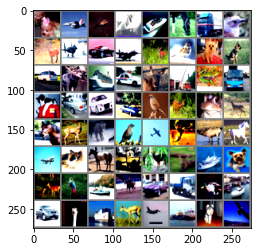

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [9]:
import torch.nn as nn
import torch.nn.functional as F
from Model import Resnet_Architecture
model = Resnet_Architecture(Model_Layers=18)
model.to(dataloader.device)
model.summary(input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [10]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
Loss="CrossEntropyLoss"
EPOCHS = 20
model.device=dataloader.device
optimizer = optim.SGD(model.parameters(), lr=0.050, weight_decay=0.0018 ,momentum=0.9)
scheduler=StepLR(optimizer,step_size=4,gamma=0.1)
model.gotrain(optimizer=optimizer, train_loader=trainloader, test_loader=testloader, epochs=EPOCHS, statspath=S8_PROJECT_PATH+"/Save_Model/", scheduler=scheduler, batch_scheduler=False, L1lambda=0, LossType=Loss)


Validation loss decreased (100000.000000 --> 1.619011).  Saving model ...
Epoch: 1, Train set: Average loss: 0.0243, Accuracy: 43.44%; Test set: Average loss: 1.6190, Accuracy: 52.33%
Learning Rate = 0.050000



Validation loss decreased (1.619011 --> 1.281014).  Saving model ...
Epoch: 2, Train set: Average loss: 0.0159, Accuracy: 64.08%; Test set: Average loss: 1.2810, Accuracy: 65.00%
Learning Rate = 0.050000



Epoch: 3, Train set: Average loss: 0.0123, Accuracy: 72.74%; Test set: Average loss: 1.3311, Accuracy: 64.09%
Learning Rate = 0.050000



Validation loss decreased (1.281014 --> 1.020240).  Saving model ...
Epoch: 4, Train set: Average loss: 0.0112, Accuracy: 75.38%; Test set: Average loss: 1.0202, Accuracy: 71.52%
Learning Rate = 0.005000



Validation loss decreased (1.020240 --> 0.553783).  Saving model ...
Epoch: 5, Train set: Average loss: 0.0065, Accuracy: 86.21%; Test set: Average loss: 0.5538, Accuracy: 84.66%
Learning Rate = 0.005000



Validation loss decreased (0.553783 --> 0.524322).  Saving model ...
Epoch: 6, Train set: Average loss: 0.0048, Accuracy: 89.98%; Test set: Average loss: 0.5243, Accuracy: 85.41%
Learning Rate = 0.005000



Epoch: 7, Train set: Average loss: 0.0035, Accuracy: 92.72%; Test set: Average loss: 0.5625, Accuracy: 84.77%
Learning Rate = 0.005000



Epoch: 8, Train set: Average loss: 0.0025, Accuracy: 94.98%; Test set: Average loss: 0.5731, Accuracy: 84.69%
Learning Rate = 0.000500



Validation loss decreased (0.524322 --> 0.505552).  Saving model ...
Epoch: 9, Train set: Average loss: 0.0011, Accuracy: 98.44%; Test set: Average loss: 0.5056, Accuracy: 86.96%
Learning Rate = 0.000500



Validation loss decreased (0.505552 --> 0.504668).  Saving model ...
Epoch: 10, Train set: Average loss: 0.0007, Accuracy: 99.33%; Test set: Average loss: 0.5047, Accuracy: 87.30%
Learning Rate = 0.000500



Epoch: 11, Train set: Average loss: 0.0005, Accuracy: 99.61%; Test set: Average loss: 0.5130, Accuracy: 87.06%
Learning Rate = 0.000500



Epoch: 12, Train set: Average loss: 0.0005, Accuracy: 99.73%; Test set: Average loss: 0.5265, Accuracy: 87.14%
Learning Rate = 0.000050



Epoch: 13, Train set: Average loss: 0.0004, Accuracy: 99.85%; Test set: Average loss: 0.5222, Accuracy: 87.06%
Learning Rate = 0.000050



Epoch: 14, Train set: Average loss: 0.0004, Accuracy: 99.83%; Test set: Average loss: 0.5069, Accuracy: 87.20%
Learning Rate = 0.000050



Epoch: 15, Train set: Average loss: 0.0004, Accuracy: 99.86%; Test set: Average loss: 0.5080, Accuracy: 87.06%
Learning Rate = 0.000050



Epoch: 16, Train set: Average loss: 0.0004, Accuracy: 99.88%; Test set: Average loss: 0.5189, Accuracy: 87.24%
Learning Rate = 0.000005



Epoch: 17, Train set: Average loss: 0.0004, Accuracy: 99.90%; Test set: Average loss: 0.5187, Accuracy: 87.12%
Learning Rate = 0.000005



Epoch: 18, Train set: Average loss: 0.0004, Accuracy: 99.90%; Test set: Average loss: 0.5143, Accuracy: 87.09%
Learning Rate = 0.000005



Epoch: 19, Train set: Average loss: 0.0004, Accuracy: 99.90%; Test set: Average loss: 0.5125, Accuracy: 87.15%
Learning Rate = 0.000005



Validation loss decreased (0.504668 --> 0.503364).  Saving model ...
Epoch: 20, Train set: Average loss: 0.0004, Accuracy: 99.90%; Test set: Average loss: 0.5034, Accuracy: 87.19%
Learning Rate = 0.000001



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:  truck   dog   dog plane


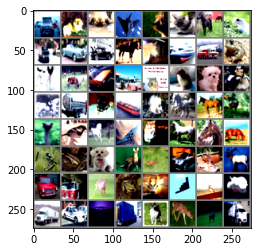

In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [0]:
outputs = model(images.to(model.device))

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [13]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  truck   dog   dog plane


The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [14]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images.to(model.device)).to("cpu")
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 87 %


That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [15]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images.to(model.device)).to('cpu')
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 85 %
Accuracy of   car : 96 %
Accuracy of  bird : 80 %
Accuracy of   cat : 75 %
Accuracy of  deer : 76 %
Accuracy of   dog : 69 %
Accuracy of  frog : 91 %
Accuracy of horse : 93 %
Accuracy of  ship : 95 %
Accuracy of truck : 93 %
